In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
sns.set_palette('husl')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [4]:
# Load the processed data
processed_data_path = "processed_battery_cycle_data.csv"

try:
    df = pd.read_csv(processed_data_path)
    print(f"Successfully loaded data with shape: {df.shape}")
    print(f"\nNumber of unique batteries: {df['battery_id'].nunique()}")
    print(f"\nColumns in the dataset:")
    for col in df.columns:
        print(f"- {col}")
except FileNotFoundError:
    print(f"Error: Could not find {processed_data_path}")
    print("Please run process_data.py first to generate the processed data.")

Successfully loaded data with shape: (8522, 20)

Number of unique batteries: 23

Columns in the dataset:
- battery_id
- cycle_number
- is_reference_cycle
- discharge_duration_s
- avg_current_A
- capacity_Ah
- avg_voltage_V
- start_voltage_V
- end_voltage_V
- delta_voltage_V
- avg_temp_C
- start_temp_C
- end_temp_C
- delta_temp_C
- max_temp_C
- avg_power_W
- energy_Wh
- SOH_%
- RUL_cycles
- q_initial_Ah


In [5]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battery_id            8522 non-null   object 
 1   cycle_number          8522 non-null   int64  
 2   is_reference_cycle    8522 non-null   bool   
 3   discharge_duration_s  8522 non-null   float64
 4   avg_current_A         8522 non-null   float64
 5   capacity_Ah           8522 non-null   float64
 6   avg_voltage_V         8522 non-null   float64
 7   start_voltage_V       8522 non-null   float64
 8   end_voltage_V         8522 non-null   float64
 9   delta_voltage_V       8522 non-null   float64
 10  avg_temp_C            8522 non-null   float64
 11  start_temp_C          8522 non-null   float64
 12  end_temp_C            8522 non-null   float64
 13  delta_temp_C          8522 non-null   float64
 14  max_temp_C            8522 non-null   float64
 15  avg_pow

In [6]:
# Display summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,cycle_number,discharge_duration_s,avg_current_A,capacity_Ah,avg_voltage_V,start_voltage_V,end_voltage_V,delta_voltage_V,avg_temp_C,start_temp_C,end_temp_C,delta_temp_C,max_temp_C,avg_power_W,energy_Wh,SOH_%,RUL_cycles,q_initial_Ah
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,7750.000000,8522.000000
mean,260.805093,710.786473,11.975938,2.025162,6.239891,-0.026011,4.752629,-4.778639,47.730051,24.801928,66.158795,41.356868,66.169754,76.754925,13.123711,85.674779,112.081161,2.457500
std,203.154514,553.809383,4.297162,0.425032,1.217650,0.000103,0.913574,0.913574,9.838442,1.973458,16.081254,15.937855,16.065757,26.808567,2.863214,9.639551,150.648076,0.014207
min,0.000000,0.000000,0.460000,0.000000,-0.027000,-0.027000,-0.027000,-8.503000,-58.617453,-75.974000,-60.304000,-0.032000,-41.846000,-0.012474,-0.000010,0.010454,0.000000,2.431978
25%,96.000000,494.893000,9.670102,1.950055,6.288329,-0.026000,4.909000,-4.960000,43.459284,23.536000,59.148000,34.068750,59.156500,63.485262,12.457055,80.153969,0.000000,2.451236
50%,217.000000,562.476000,13.428614,2.081525,6.422141,-0.026000,4.920000,-4.946000,48.129896,24.934000,66.936000,42.329500,66.945000,85.159227,13.491552,85.473290,35.000000,2.453333
75%,382.000000,740.962750,15.018109,2.223760,6.586275,-0.026000,4.934000,-4.935000,52.797923,26.055000,74.976000,50.455750,75.002500,95.229817,14.487003,91.655947,191.000000,2.459691
max,890.000000,3560.949000,23.885448,2.492552,7.511686,-0.026000,8.477000,0.001000,74.672102,29.406000,109.024000,85.788000,109.024000,179.896902,18.532622,100.000000,642.000000,2.492552


In [7]:
# Check for missing values
print("Missing Values per Column:")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

Missing Values per Column:


,Missing Values,Percentage
RUL_cycles,772,9.058906


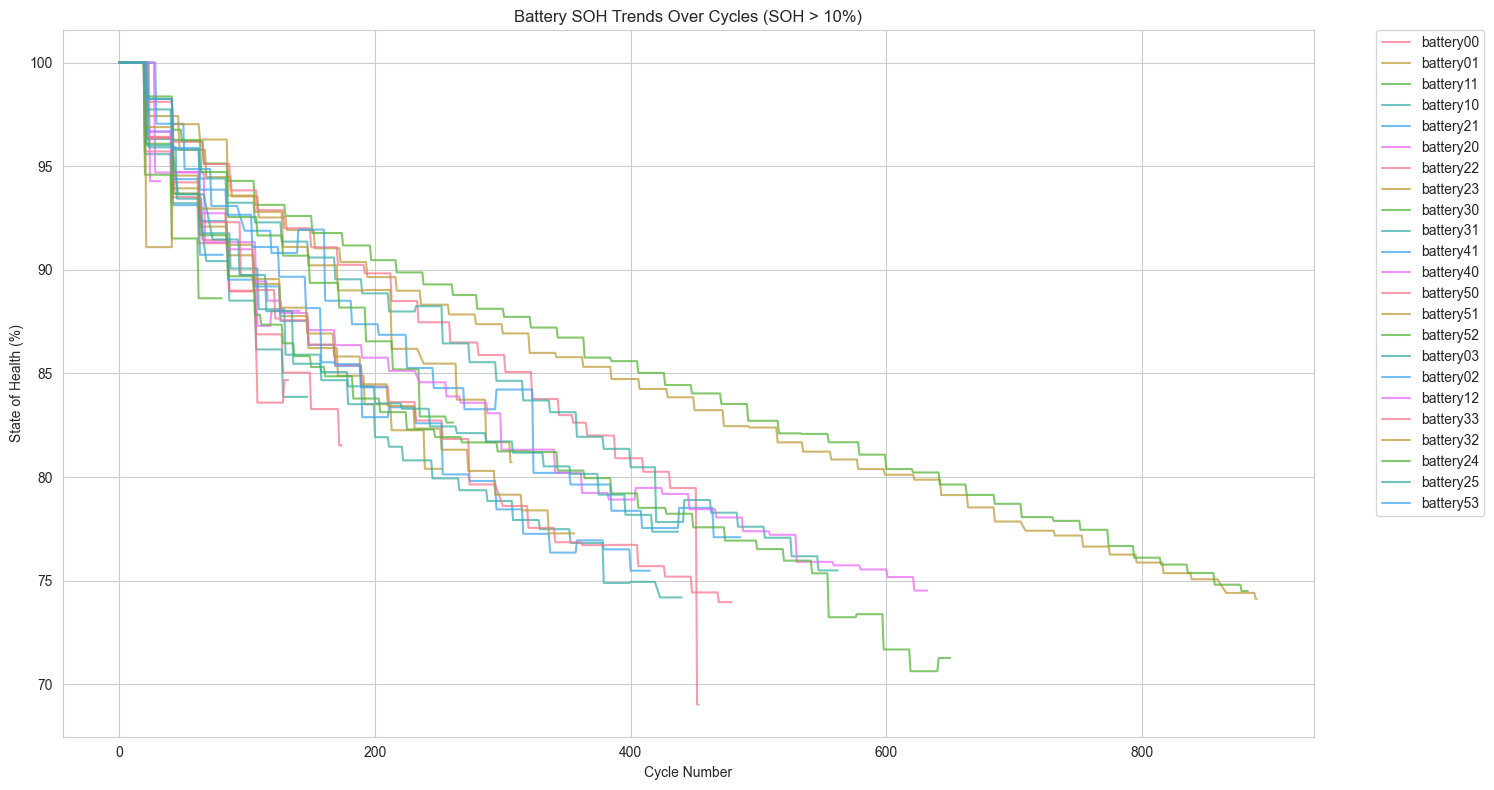


EOL (End of Life) Statistics for Each Battery (SOH > 10%):
            EOL_SOH_%  Final_SOH_%  Last_Cycle
battery_id                                    
battery22       69.02        69.02         453
battery24       70.63        71.27         650
battery33       73.97        73.97         479
battery01       74.12        74.12         890
battery03       74.19        74.19         440
battery11       74.50        74.50         883
battery12       74.53        74.53         632
battery02       75.48        75.48         415
battery31       75.50        75.50         562
battery41       77.10        77.10         486
battery32       77.28        77.28         356
battery25       77.36        77.36         437
battery23       80.40        80.40         252
battery51       80.71        80.71         307
battery00       81.53        81.53         174
battery52       82.63        82.63         261
battery50       83.59        84.68         132
battery10       83.87        83.87         147


In [11]:
# Filter out values close to 0 (let's say SOH < 10%)
df_filtered = df[df['SOH_%'] > 10]

# Create a figure for SOH analysis
plt.figure(figsize=(15, 8))

# Plot SOH trends for each battery
for battery in df_filtered['battery_id'].unique():
    battery_data = df_filtered[df_filtered['battery_id'] == battery]
    plt.plot(battery_data['cycle_number'], battery_data['SOH_%'], 
             label=battery, alpha=0.7)

# Add labels and title
plt.xlabel('Cycle Number')
plt.ylabel('State of Health (%)')
plt.title('Battery SOH Trends Over Cycles (SOH > 10%)')
plt.grid(True)

# Add legend with a reasonable number of entries
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and display EOL statistics for filtered data
print("\nEOL (End of Life) Statistics for Each Battery (SOH > 10%):")
eol_stats = df_filtered.groupby('battery_id').agg({
    'SOH_%': ['min', 'last'],  # min for EOL, last for final SOH
    'cycle_number': 'max'  # last cycle number
}).round(2)

eol_stats.columns = ['EOL_SOH_%', 'Final_SOH_%', 'Last_Cycle']
print(eol_stats.sort_values('EOL_SOH_%', ascending=True))

# Calculate and display average final SOH
avg_final_soh = eol_stats['Final_SOH_%'].mean()
median_final_soh = eol_stats['Final_SOH_%'].median()
print(f"\nAverage Final SOH across all batteries: {avg_final_soh:.2f}%")
print(f"Median Final SOH across all batteries: {median_final_soh:.2f}%")